In [49]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [50]:
folder_path = os.getcwd()
data_path = os.path.join(folder_path, "mnist-original.mat")

In [51]:
mnist_raw = loadmat(data_path)

In [52]:
mnist_raw.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])

In [53]:
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

In [54]:
import numpy as np
print(np.unique(mnist["target"]))  

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [55]:
X=mnist["data"]
y=mnist["target"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

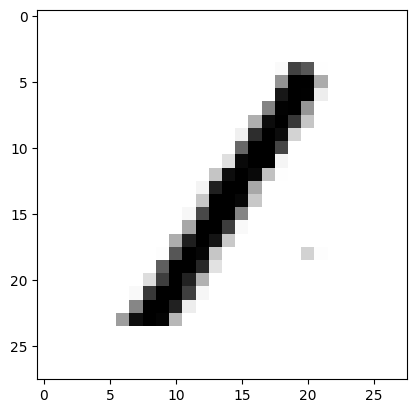

In [57]:
number = X[10000]
number_image = number.reshape(28,28)
plt.imshow(number_image,cmap=plt.cm.binary,interpolation="nearest")
plt.show()

In [58]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [59]:
X_train.shape

(56000, 784)

In [60]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [61]:
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(784,)), 
        tf.keras.layers.Dense(units=128, activation='relu'), 
        tf.keras.layers.Dense(units=10, activation='softmax')  
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model   

In [62]:
import pandas as pd

def train_model(model, feature, label, epochs, batch_size , checkpoint_filepath ='best_model.keras'):

  model_checkpoint_callback = ModelCheckpoint(
      filepath=checkpoint_filepath,
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      save_best_only=True)

  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs,
                      callbacks=[model_checkpoint_callback])

  epochs = history.epoch
  print("Finished training the model.")
  print(history.history.keys())
  return  history , model

print("Defined build_model and train_model")

Defined build_model and train_model


In [63]:
print(f"Feature size: {len(X_train)}, Label size: {len(y_train)}")

Feature size: 56000, Label size: 56000


In [ ]:
epochs = 50
my_batch_size = 256

my_model = build_model()
history, model = train_model(my_model, X_train, y_train, epochs, my_batch_size)

d:\Anaconda\envs\Deep-l\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7819 - loss: 0.7895
Epoch 2/50
 58/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9353 - loss: 0.2308

d:\Anaconda\envs\Deep-l\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9390 - loss: 0.2189
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9547 - loss: 0.1595
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9633 - loss: 0.1306
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.1042
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0890
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9801 - loss: 0.0712
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9822 - loss: 0.0644
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0577
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9874 - loss: 0.0487
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0433
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9905 - loss: 0.0365
Epoch 13/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accurac

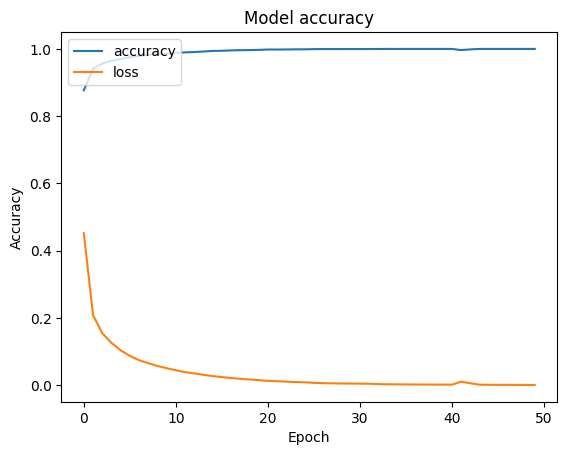

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


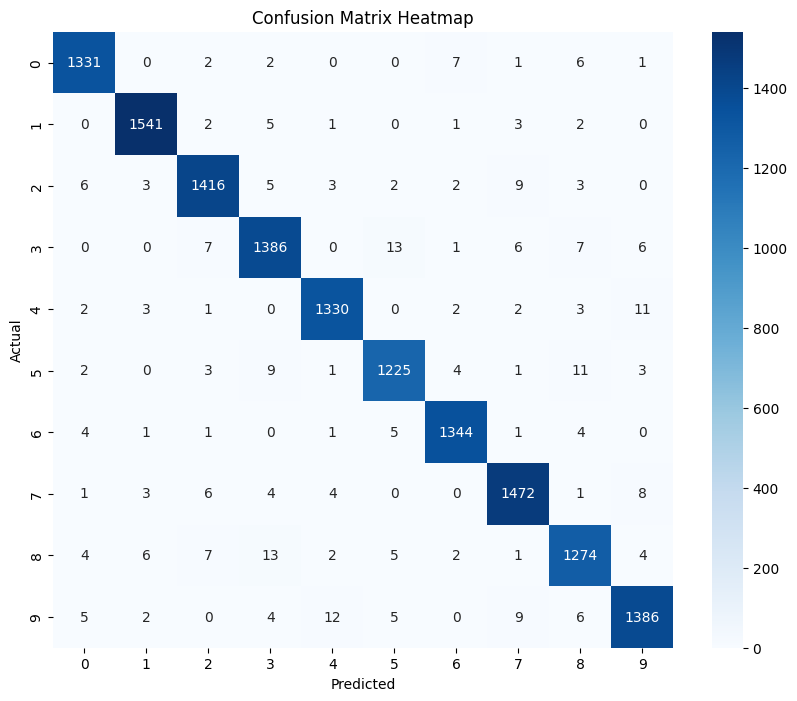

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9823    0.9859    0.9841      1350
         1.0     0.9885    0.9910    0.9897      1555
         2.0     0.9799    0.9772    0.9786      1449
         3.0     0.9706    0.9719    0.9713      1426
         4.0     0.9823    0.9823    0.9823      1354
         5.0     0.9761    0.9730    0.9745      1259
         6.0     0.9861    0.9875    0.9868      1361
         7.0     0.9781    0.9820    0.9800      1499
         8.0     0.9674    0.9666    0.9670      1318
         9.0     0.9767    0.9699    0.9733      1429

    accuracy                         0.9789     14000
   macro avg     0.9788    0.9787    0.9788     14000
weighted avg     0.9789    0.9789    0.9789     14000



In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


y_pred = my_model.predict(X_test).argmax(axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Calculate the classification report
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

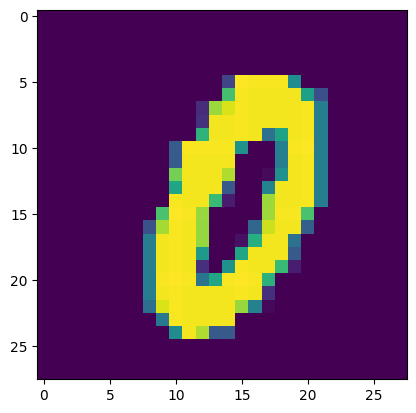

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted label: 0


In [67]:
number = X[3-1]
number_image = number.reshape(28, 28)
plt.imshow(number_image, interpolation="nearest")
plt.show()

number = number.astype('float32') / 255.0
number = number.reshape(1, 784)
prediction = my_model.predict(number).argmax(axis=1)
print(f"Predicted label: {prediction[0]}")